In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy.ndimage.filters import gaussian_filter1d,gaussian_filter,convolve
from scipy.ndimage.interpolation import rotate


# TD1

## 1) Harris corner detector

### 1.1) Questions

**-Is the Harris corner detector robust with respect to intensity shifts and intensity scalings ?** intensity shifts don't change anything : as we take the derivative of the original image the result will be the same. for intensity scalings the value of the derivative will be different but still be in the the direction so we just have to becareful about the threshold to take the corners

**-Is the Harris corner detector robust with respect to translation ?** With a translation we will detect the corner where it is because translation don't change anything about the shape in the image.

**-Is the Harris corner detector robust with respect to rotation ?** Same as the translation.

### 1.2) Practical work

In [2]:
#   Harris corner detector   #
#   input :   img = image input
#           sigd = sigma of the first gausssian filter for derivative
#           sigw = sigma of the second gaussian filter
#           k = positive constant to compute the matrix H
#           theta = threshold for corner detection
#           L_neighboor = Lenght of the neighboorhood for corner detection
#
#   output: H = the Harris corner detector matrix
#           List_corners = list of coordinates of the corners
def Harris_Corner_Detector(img ,sigd=0.5,sigw=1.5 ,k=0.1 ,theta=1e-6 ,L_neighboor=3):
    H=np.zeros_like(img)

    #Step 1
    Ix=gaussian_filter(img,sigma=sigd,order=(0,1))
    Iy=gaussian_filter(img,sigma=sigd,order=(1,0))

    #Step 2&3
    Ix2 = gaussian_filter( Ix*Ix , sigw )
    Iy2 = gaussian_filter( Iy*Iy , sigw )
    IxIy = gaussian_filter( Ix*Iy , sigw )

    #Step 4
    for i in range(np.shape(img)[0]):
        for j in range(np.shape(img)[1]):
            A=np.asarray([ [Ix2[i,j],IxIy[i,j]] , [IxIy[i,j],Iy2[i,j]] ])
            H[i,j]=np.linalg.det(A)-k*(np.trace(A)**2)
            
    #Step 5
    List_corners=[]
    Corner_image=np.zeros_like(H)
    for i in range(np.shape(img)[0]):
        for j in range(np.shape(img)[1]):
            if (i>=L_neighboor and i<=np.shape(img)[0]-L_neighboor and j>=L_neighboor and j<=np.shape(img)[1]-L_neighboor):
                if (np.amax(H[i-L_neighboor:i+L_neighboor,j-L_neighboor:j+L_neighboor])==H[i,j] and H[i,j]>theta ):
                    List_corners.append((i,j))
                    Corner_image[i,j]=1


    return(H,List_corners,Corner_image)

def plot_and_print(img):
    
    if (img.shape[-1]!=img.shape[1]):
        img=np.mean(img,-1) # Normalize to have equivalent results
    (H,l,C)=Harris_Corner_Detector(img)

    plt.figure()
    plt.imshow(img,cmap='gray')
    plt.title('Original')
    plt.colorbar()
    plt.show()


    plt.figure()
    plt.imshow(H,cmap='gray')
    plt.title('Harris Response Matrix')
    plt.colorbar()
    plt.show()

    plt.figure()
    plt.imshow(C,cmap='gray')
    plt.title('Corner detection Image')
    plt.colorbar()
    plt.show()
    for i in range(len(l)):
        print('Corner ',i+1,' in position', l[i])


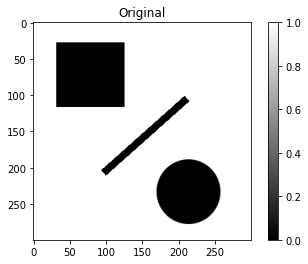

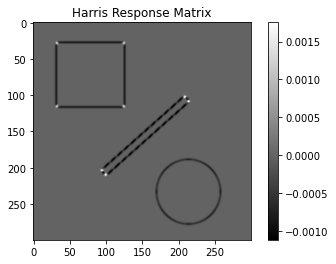

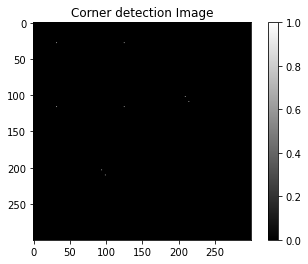

Corner  1  in position (28, 32)
Corner  2  in position (28, 125)
Corner  3  in position (102, 209)
Corner  4  in position (109, 214)
Corner  5  in position (116, 32)
Corner  6  in position (116, 125)
Corner  7  in position (203, 94)
Corner  8  in position (210, 99)


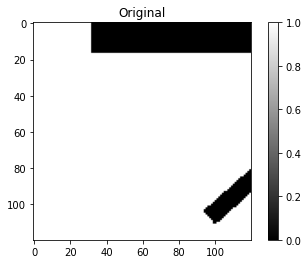

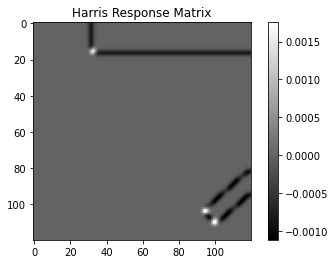

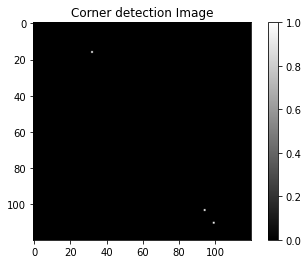

Corner  1  in position (16, 32)
Corner  2  in position (103, 94)
Corner  3  in position (110, 99)


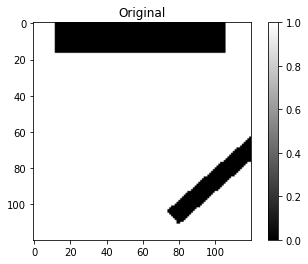

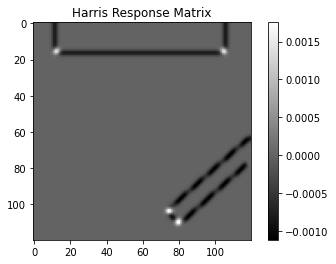

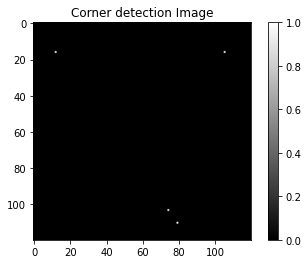

Corner  1  in position (16, 12)
Corner  2  in position (16, 105)
Corner  3  in position (103, 74)
Corner  4  in position (110, 79)


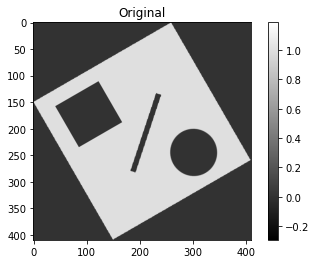

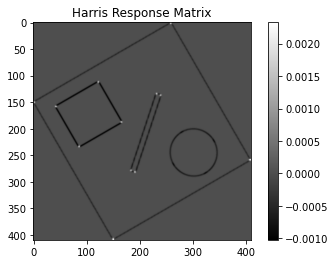

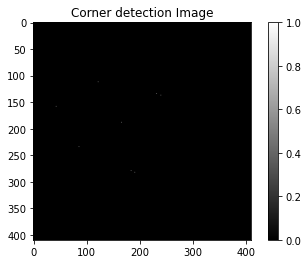

Corner  1  in position (112, 122)
Corner  2  in position (134, 232)
Corner  3  in position (137, 240)
Corner  4  in position (158, 43)
Corner  5  in position (188, 166)
Corner  6  in position (234, 86)
Corner  7  in position (279, 184)
Corner  8  in position (282, 191)


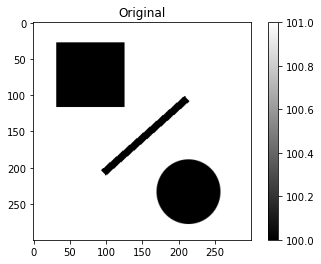

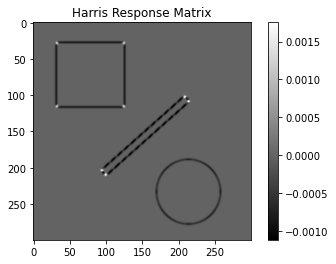

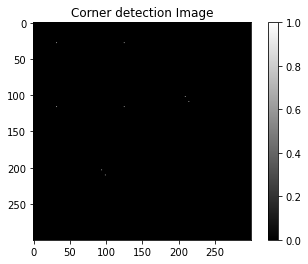

Corner  1  in position (28, 32)
Corner  2  in position (28, 125)
Corner  3  in position (102, 209)
Corner  4  in position (109, 214)
Corner  5  in position (116, 32)
Corner  6  in position (116, 125)
Corner  7  in position (203, 94)
Corner  8  in position (210, 99)


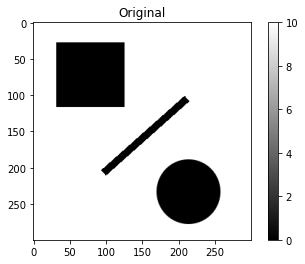

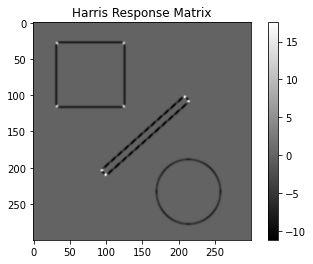

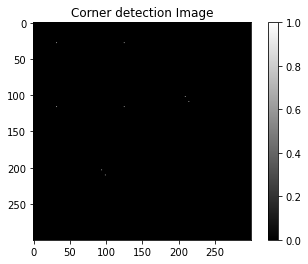

Corner  1  in position (28, 32)
Corner  2  in position (28, 125)
Corner  3  in position (102, 209)
Corner  4  in position (109, 214)
Corner  5  in position (116, 32)
Corner  6  in position (116, 125)
Corner  7  in position (203, 94)
Corner  8  in position (210, 99)


In [3]:
L=[]
img=plt.imread('images/CircleLineRect.png')
L.append(img)

img_crop1=img[100:220,0:120]
L.append(img_crop1)

img_crop2=img[100:220,20:140]
L.append(img_crop2)

img_rotate=rotate(img,30)
L.append(img_rotate)

img_shift=img+100
L.append(img_shift)

img_scale=img*10
L.append(img_scale)


for im in L:
    plot_and_print(im)

#
## 2) Canny edge detection


### 2.1) Questions



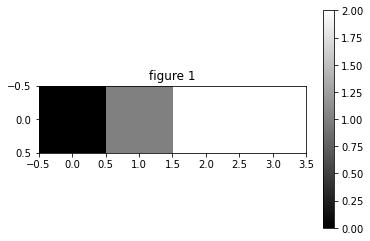

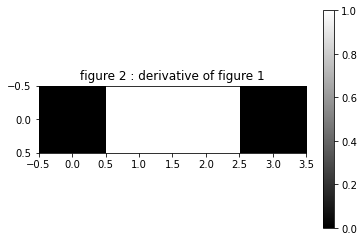

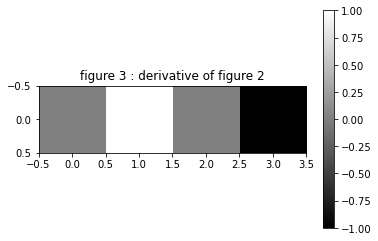

In [4]:
I1=np.asarray([[0,1,2,2]])
I2=np.asarray([[0,1,1,0]])
I3=np.asarray([[0,1,0,-1]])
plt.figure()
plt.imshow(I1,cmap='gray')
plt.title("figure 1")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(I2,cmap='gray')
plt.title("figure 2 : derivative of figure 1")
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(I3,cmap='gray')
plt.title("figure 3 : derivative of figure 2")
plt.colorbar()
plt.show()

an edge is a change of color, here just a level of gray. There is an edge when the derivative is non-null

-> 1 edge for figure 1 ( thickness of 2) and 2 egdes for figure 2 (one up one down but can be count as 1 if the line is not thick enough)

### 2.2) Practical Work

In [5]:
DEFAULT_SIGMA=1
DEFAULT_THRESHOLD=0.1

In [6]:
def smooth(img,sigma=DEFAULT_SIGMA):
    im_smooth=gaussian_filter(img,sigma=sigma)
    return(im_smooth)


def sobel(img):
    f_sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    f_sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
    Sx=convolve(img, f_sobel_x)
    Sy=convolve(img, f_sobel_y)
    return((Sx/np.max(Sx),Sy/np.max(Sy)))


def grad_mag(img):
    Ix,Iy=sobel(img)
    grad_mag=np.sqrt(Ix*Ix+Iy*Iy)
    return grad_mag/np.max(grad_mag)


def grad_dir(img):
    Ix,Iy=sobel(img)
    grad_dir = np.degrees(np.arctan2(Iy, Ix))
    return grad_dir


def simple_dir(grad_dir) :
    L,l=grad_dir.shape
    out = np.zeros_like(grad_dir)
    for i in range(1, L-1) :
        for j in range(1, l-1) :
            if((grad_dir[i, j] > -22.5 and grad_dir[i, j] <= 22.5) or grad_dir[i, j] <= -157.5 or grad_dir[i, j] > 157.5) :
                out[i, j]=0
            elif((grad_dir[i, j] > 22.5 and grad_dir[i, j] <= 67.5) or (grad_dir[i, j] <= -112.5 and grad_dir[i, j] > -157.5)) :
                out[i, j]=45 
            elif((grad_dir[i, j] > 67.5 and grad_dir[i, j] <= 112.5) or (grad_dir[i, j] <= -67.5 and grad_dir[i, j] > -112.5)) : 
                out[i, j]=90  
            else:
                out[i, j]=135
    return out


def drop_grad(img,threshold=DEFAULT_THRESHOLD):
    M=grad_mag(img)
    out=np.zeros_like(M)
    L,l=M.shape
    for i in range(1,L-1):
        for j in range(1,l-1):
            if M[i,j]>=threshold:
                out[i,j]=M[i,j]
    return out


def Canny(img,sigma=DEFAULT_SIGMA,threshold=DEFAULT_THRESHOLD):
    
    #Step 1
    img=smooth(img,sigma=sigma)

    #Step 2,3
    M=drop_grad(img,threshold=threshold)
    D=simple_dir(grad_dir(img))

    #Step 4
    L,l=img.shape
    out=np.zeros_like(img)
    for i in range(1,L-1):
        for j in range(1,l-1):
            if(D[i,j] == 0):
                if (M[i,j] > M[i,j-1] and M[i,j] >= M[i,j+1]):
                    out[i,j]=M[i,j]
            elif(D[i,j] == 45):
                if (M[i,j] > M[i-1,j-1] and M[i,j] >=M[i+1,j+1]):
                    out[i,j]=M[i,j]
            elif(D[i,j] == 90):
                if (M[i,j] > M[i-1,j] and M[i,j] >= M[i+1,j]):
                    out[i,j]=M[i,j]
            elif(D[i,j] == 135):
                if (M[i,j] > M[i-1,j+1] and M[i,j] >= M[i+1,j-1]):
                    out[i,j]=M[i,j]
    return(out)


def plot_all(name, sigma=DEFAULT_SIGMA, threshold=DEFAULT_THRESHOLD):
    img=plt.imread('images/'+name)
    if (img.shape[-1]!=img.shape[1]):
        img=np.mean(img,-1)
    img = img/img.max()  # Normalize to have equivalent results
    
    plt.figure()
    plt.imshow(img,cmap='gray')
    plt.title('Original '+name)
    plt.colorbar()
    plt.show()

    plt.figure()
    plt.imshow(smooth(img,sigma=sigma),cmap='gray')
    plt.title('Smooth '+name)
    plt.colorbar()
    plt.show()

    plt.figure()
    plt.imshow(grad_dir(img),cmap='gray')
    plt.title('Direction of '+name)
    plt.colorbar()
    plt.show()

    plt.figure()
    plt.imshow(grad_mag(img),cmap='gray')
    plt.title('Magnitude gradient of '+name)
    plt.colorbar()
    plt.show()

    plt.figure()
    plt.imshow(drop_grad(img,threshold=threshold),cmap='gray')
    plt.title('Magnitude gradient of '+name+' with threshold')
    plt.colorbar()
    plt.show()

    plt.figure()
    plt.imshow(Canny(img,sigma=sigma,threshold=threshold),cmap='gray')  
    plt.title('Canny edge detection on '+name)    
    plt.colorbar()
    plt.show()


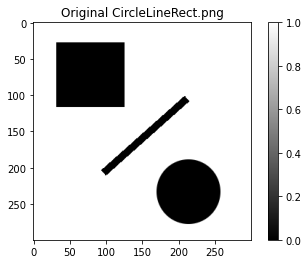

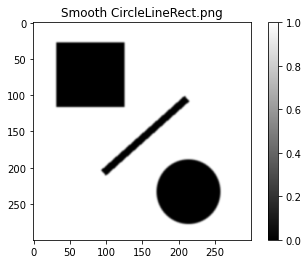

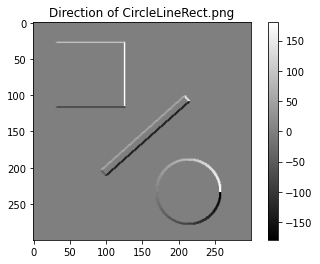

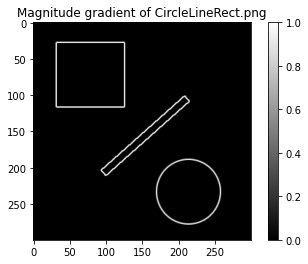

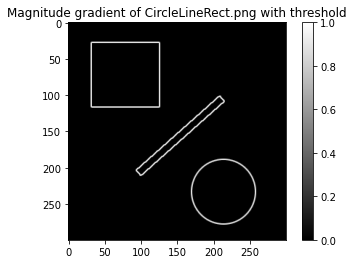

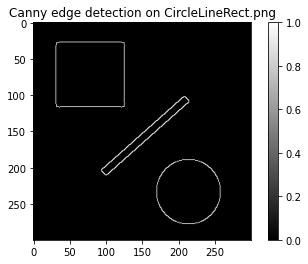

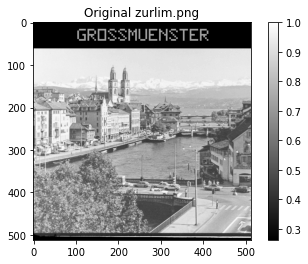

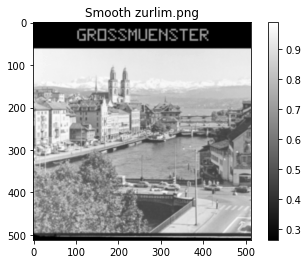

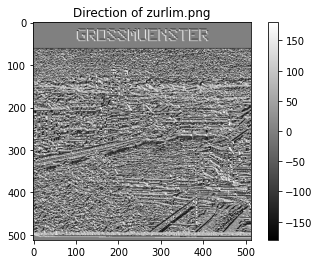

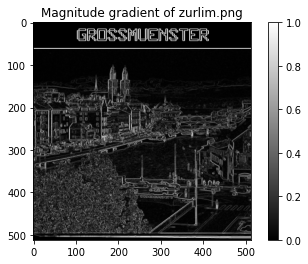

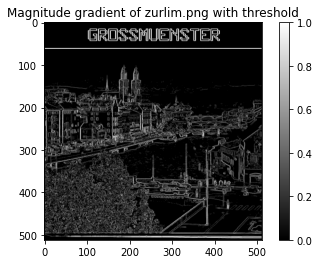

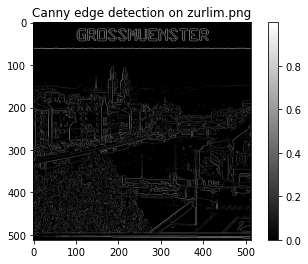

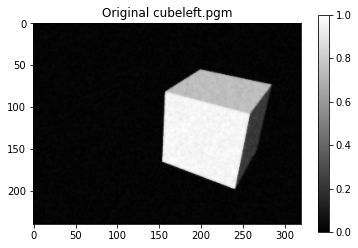

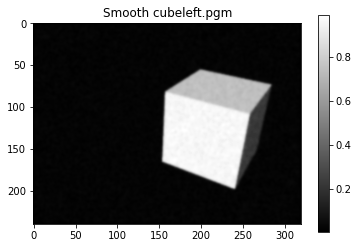

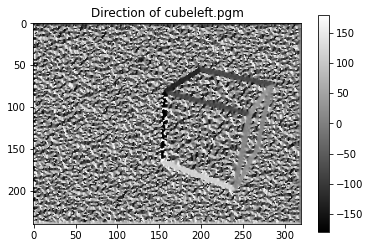

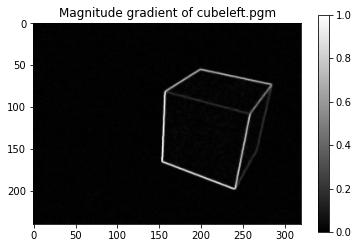

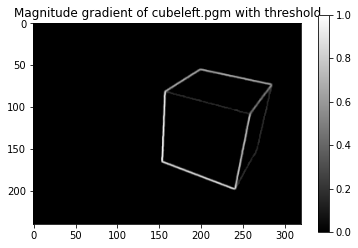

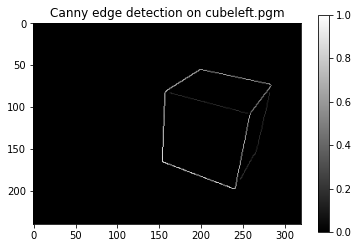

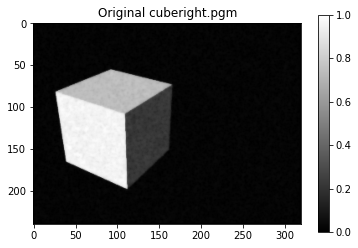

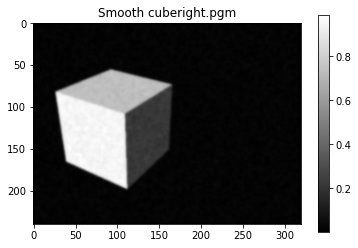

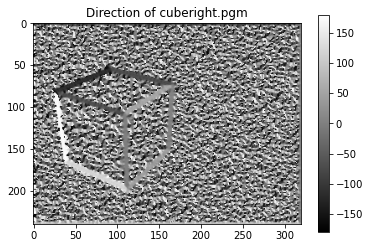

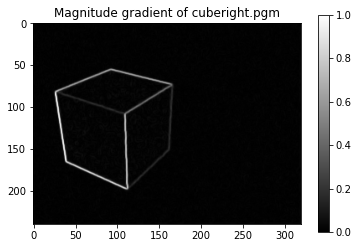

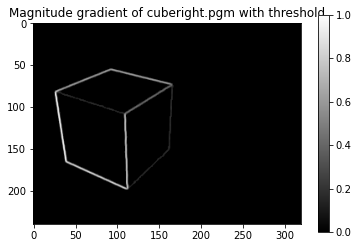

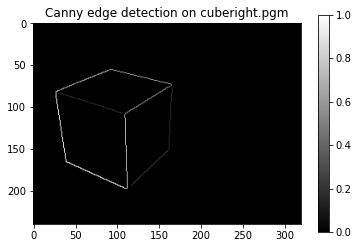

In [7]:
L=['CircleLineRect.png','zurlim.png','cubeleft.pgm','cuberight.pgm']
for name in L:
    plot_all(name)